# Psychrometrics

![](../images/20160618_090132.jpg)

Psychrometrics is the study of the physical and thermodynamic properties of air and water vapor mixtures. Psychrometrics has a wide range of drying, humidification, weather, and environmental applications. The same principles, however, apply to any mixture of a condensable vapor mixed with non-condensable gase.

* [Definitions of Humidity](#Definitions)
    * [Relative Humidity](#RelativeHumidity)
    * [Absolute Humidity](#AbsoluteHumidity)
    * [Specific Humidity](#SpecificHumidity)
    * [Mixing Ratio](#MixingRatio)
    * [Dew Point](#DewPoint)
* [Data Sources](#DataSources)
    * [Molar Masses](#MolarMasses)
    * [Vapor Pressure of Water](#VaporPressure)
    * [Steam Tables](#SteamTables)
* [Thermodynamic Modeling](#ThermodynamicModeling)
    * [Specific Volume](#SpecificVolume)
    * [Enthalpy](#Enthapy)
    * [Wet Bulb Temperature](#WetBulb)
* [Psychrometric Chart](#PsychrometricChart)
* [References](#References)
* [Exercises and Applications](#ExercisesApplications)


## Definitions of Humidity <a id='Definitions'></a>

The familiar definitions of mass and mole fraction, of course, apply to a mixture of a vapor and condensable gas. But there are also additional methods for expressing composition and the relative amount of the condensable component.

For the definitions below, we will use $A$ to represent the non-condensable component (typically air), and $W$ to denote the condensable component (typically water).

### Relative Humidity <a id='RelativeHumidity'></a>

Relative humidity (symbol RH or $\phi$) is the ratio of the partial pressure of water vapor to the equilibrium saturation pressure. 

$$\mbox{Relative Humidity} = RH = \phi = \frac{p_W}{p^{sat}_W(T)}$$

Relative humidity depends on temperature and, for mixtures of fixed composition, pressure. It is commonly expressed as a percentage.

### Absolute Humidity <a id='AbsoluteHumidity'></a>

Absolute humidity (symbol AH) is the total mass of water vapor per unit volume of humid air. 

$$\mbox{Absolute Humidity} = AH = \frac{m_W}{V}$$

Typical units are $kg/m^3$ or $g/m^3$. Absolute humidity is useful for expressing how much water is present in a given volume at a particular pressure and temperature. However, because volume varies with temperature and pressure, volumetric measures are generally not used directly in mass and energy balances.

Assuming the ideal gas law holds, the mass of water in a given volume is

$$AH = \frac{m_W}{V} \approx \frac{M_W p_W}{RT} \approx \frac{M_W y_W P}{RT}$$

where $M_W$ is the molar mass of water, $p_W$ is the partial pressure, and $y_W$ is mole fraction. For a given mixture, increasing pressure compresses the mixture into a smaller volume and therefore increases absolute humidity. Conversely, increasing temperature expands the volume and therefore descreases absolute humidity. 

### Specific Humidity

Specific Humidity (symbol SH) is the mass of water divided by total mass of moist air. 

$$\mbox{Specific Humidity} = SH = \frac{m_W}{m_A + m_W}$$

This is equivalent to mass fraction. While this would work for a variety of applications, the resulting calculations are more complicated than necessay for the majority of cases where the mass flow of dry air is often constant. 

### Mixing Ratio (or Moisture Content, or Humidity Ratio) <a id='Mixing Ratio'></a>

Mixing Ratio (or Moisture Content) (symbol $w$) is ratio of the mass of water vapor to the mass of dry air.

$$\mbox{Mixing Ratio} = w = \frac{m_W}{m_A}$$

Typical units are kg of water per kg of dry air. (Older literature will sometimes show units of grains of water per pound of dry air. There are 7000 grains per pound.)

Mixing ratio is the most commonly encountered measure of humidity because of it's computational utility in humidifciation and drying applications.

From the ideal gas law

$$m_W = \frac{M_W p_W v}{RT}$$

and

$$m_A = \frac{M_A p_A v}{RT} = \frac{M_A (P-p_W) v}{RT}$$

Taking the ratio

$$w = \frac{m_W}{m_A} = \frac{M_W}{M_A} \frac{p_W}{P - p_W} = \frac{\omega p_W}{P - p_W}$$

where $\omega = \frac{M_W}{M_A} = 0.622$ is the ratio of molar masses. At saturation the mixing ratio is

$$w_{sat}(T,P) = \frac{\omega p_W^{sat}(T)}{P - p_W^{sat}(T)}$$

For a relative humidity $\phi$, the mixing ratio is

$$w(T,P,\phi) = \frac{\omega \phi p_W^{sat}(T)}{P - \phi p_W^{sat}(T)}$$

This expression demonstrates that the mixing ratio depends on temperature, pressure, and relative humidity.

### Dew Point <a id='DewPoint'></a>

The dew point (symbol $T_{dew}$) is the temperature at which the first drop of dew is formed when air is cooled at constant pressure.  It is an indirect measure of moisture content.

## Data Sources <a id="DataSources"></a>

### Molar Masses of Air and Water <a id="MolarMasses"></a>

In [1]:
Ma = 0.78*(2*14.00675) + 0.21*(2*15.994) + 0.01*39.948
print "Molar Mass of Air = {0:0.2f}".format(Ma)

Mw = 2*1.00794 + 15.9994
print "Molar Mass of Water = {0:0.2f}".format(Mw)

print "Ratio Mw/Ma = {0:0.4f}".format(Mw/Ma)

Molar Mass of Air = 28.97
Molar Mass of Water = 18.02
Ratio Mw/Ma = 0.6219


### Vapor Pressure of Water <a id="VaporPressure"></a>

There are a number of widely used correlations for the vapor pressure of water, among them Antoine's equation, Goff-Gratch equation, and the Arden Buck equation. The following cell implements correlations recommended by [Wagner and Pru&#223;](http://thermophysics.ru/pdf_doc/IAPWS_1995.pdf) for the IAPWS 1995 Steam Tables.

For the range 0 $^\circ$C to 373 $^\circ$C, the vapor pressure of liquid water is given by

$$\ln\frac{p^{sat}_w}{p_c} = \frac{T_c}{T}\left(a_1\vartheta + a_2\vartheta^{1.5}
+ a_3\vartheta^3 + a_4\vartheta^{3.5} + a_5\vartheta^4 + a_6\vartheta^{7.5}\right)$$

where 

$$\vartheta = 1 - \frac{T}{T_c}$$

and $T_c = 647.096\,K$ and $P_c = 220.640$ bar are the temperature and pressure at the critical point. For the range -100 $^\circ$C to 0.01 $^\circ$C, the vapor pressure of ice is calculated using 

$$\ln\frac{p^{sat}_w}{p_n} = b_0(1 - \theta^{-1.5}) + b_1(1-\theta^{-1.25})$$

where

$$\theta = \frac{T}{T_n}$$

and $T_n = 0.01 ^\circ$C and $p_n = 0.00611657\,bar$ are the triple point temperature and pressure. These correlations assume temperature in Kelvin, and returns pressure in the same units at $p_c$ and $p_n$.

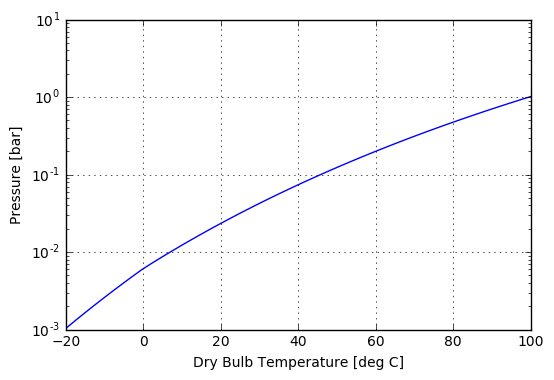

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np


def pSatW_(T):
    """Calculates the saturation pressure of water.
    
    Args:
        T: Temperature in degrees Celsius between -100C and 373C.
        
    Returns:
        The saturation pressure in bars.

    """
    Tc = 647.096         # critcal temperature in K
    Pc = 220.640         # critical pressure of water in bar
    a = np.array([0.0, -7.85951783, 1.84408259, -11.7866497, 22.6807411, -15.9618719, 1.80122502])
    
    Tn = 273.16          # triple point temperature in K
    Pn = 0.00611657      # triple point pressure in bar
    b = np.array([-13.928169, 34.707823])

    if T >= 0.01 and T <= 373.0:
        phi = 1.0 - (T + 273.15)/Tc
        return Pc*np.exp((Tc/(T + 273.15))*(a[1]*phi + a[2]*phi**1.5
            + a[3]*phi**3.0 + a[4]*phi**3.5 + a[5]*phi**4.0 + a[6]*phi**7.5))
    elif T < 0.01 and T >= -100.0:
        theta = (T+273.15)/Tn
        return Pn*np.exp(b[0]*(1 - theta**-1.5) + b[1]*(1 - theta**-1.25))
    else:
        return float('nan')
        #raise ValueError('Temperture {0:0.2f} outside of valid range for pSatW.'.format(T))
  
# extend function to nparray
pSatW = np.vectorize(pSatW_)


T = np.linspace(-20.0, 100.0)
plt.semilogy(T,pSatW(T))
plt.xlabel('Dry Bulb Temperature [deg C]')
plt.ylabel('Pressure [bar]')
plt.grid()

### Steam Tables  <a id="SteamTables"></a>

The International Association for the Properties of Water and Steam (IAPWS) produces highly authoritative data sets for the properties of water and steam.  Their 'recommended formulations' are the foundation for the steam tables most widely used by engineers.

[iapws](https://pypi.python.org/pypi/iapws) is an implementation of IAPWS-IF97 formulation for the properties of water and steam. The following cells demonstrate the installation of iapws, and use iapws to calculate properties needed for psychrometry.

#### Installation

In [3]:
# shell escape command to install iapws
!pip install iapws

# sample usage of iapws to demonstrate successful installation
from iapws import IAPWS97

# units are MPa, K, kJ/kg

sat_steam=IAPWS97(P=1,x=1)                #saturated steam with known P
sat_liquid=IAPWS97(T=370, x=0)            #saturated liquid with known T
steam=IAPWS97(P=2.5, T=500)               #steam with known P and T
print(sat_steam.h, sat_liquid.h, steam.h) #calculated enthalpies

(2777.1195376846617, 405.81466030352686, 2811.704862899988)


#### Heat of Vaporization

In [4]:
def Hvap(T):
    sat_vapor = IAPWS97(T = T + 273.15, x=1)
    sat_liquid = IAPWS97(T = T + 273.15, x=0)
    return sat_vapor.h - sat_liquid.h
    
print "Heat of Vaporization at O deg C = {0:0.2f} kJ/kg".format(Hvap(0.0))

Heat of Vaporization at O deg C = 2500.93 kJ/kg


#### Heat Capacities

In [5]:
T = 25.0

def Cpvap(T):
    return IAPWS97(T = T + 273.15, x=1).cp

def Cpliq(T):
    return IAPWS97(T = T + 273.15, x=0).cp

sat_vapor = IAPWS97(T = T + 273.15, x=1)
print "Heat Capacity of Water Vapor at {0:0.1f}C = {1:0.3f} kJ/kg/K".format(T,Cpvap(25))

sat_liq = IAPWS97(T = T + 273.15, x=0)
print "Heat Capacity of Water Liquid at {0:0.1f}C = {1:0.3f} kJ/kg/K".format(T,Cpliq(25))

Heat Capacity of Water Vapor at 25.0C = 1.912 kJ/kg/K
Heat Capacity of Water Liquid at 25.0C = 4.182 kJ/kg/K


## Thermodynamic Modeling <a id="ThermodynamicModeling"></a>

### Specific Volume <a id="SpecificVolume"></a>

For the purposes of psychrometric modeling, the specific volume (symbol $v$) is defined as the volume of humid air per kilogram of dry air.

Given 1 kilograms of dry air containing $w$ kilograms of water vapor, from the ideal gas law the specific volume is

$$ v = (\frac{1}{M_a} + \frac{w}{M_w})\frac{RT}{P}$$

Contours of constant specific volume are typically plotted on the psychrometric chart. For this purpose we need a relationship of $w$ to the dry bulb temperature $T$. Solving for $w$ as a function of $T$

$$w = \frac{M_wPv}{RT} - \frac{M_w}{M_a}$$

### Enthalpy <a id="Enthalpy"></a>

For humidification operations, a convenient reference state for enthalpy calculations is ($T_{ref}$ = 0 $^\circ$C, $P_{ref}$ = 1 bar) with water a saturated liquid. 

For a dry bulb temperature $T$, the specific enthalpy of saturated water vapor relative to the reference temperature is

$$\hat{h}_w(T) = \Delta \hat{H}_{vap}(T_{ref}) + \hat{C}_{p,vap}(T - T_{ref})$$

The specific enthalpy of air

$$\hat{h}_a(T) = \hat{C}_{p,air}(T - T_{ref})$$

Combining these for a mixture of 1 kilogram of dry air and $w$ kilograms of water vapor, the enthalpy per kilogram of dry air is

$$h(T,w) =  \hat{C}_{p,air}(T - T_{ref}) + w \left( \Delta \hat{H}_{vap}(T_{ref}) + \hat{C}_{p,vap}(T - T_{ref})\right)$$

Psychrometric charts typically show contours of constant specific enthalpy. Solving for $w$ in terms of $h$ and $T$

$$w = \frac{h - \hat{C}_{p,air}(T - T_{ref})}{\Delta \hat{H}_{vap}(T_{ref}) + \hat{C}_{p,vap}(T - T_{ref})}$$

### Wet Bulb Temperature <a id="WetBulb"></a>

Considered an insulated chamber containing a long, closed water bath. Humid air enters at temperature $T$ with $w$ kilogram of water vapor per kilogram of dry air. Upon passing over the water bath, evaporative cooling lowers the bath temperature to a steady-state value $T_s$.  To makeup for evaporative losses, liquid water is added to the bath at temperature $T_s$ and a rate $w_s-w$ per kilogram of dry air. The following model assumes the humid air passes exits the chamber at temperture $T_{s}$ and a partial pressure of water equal to the vapor pressure at temperature $T_s$.

The enthalpy of humid air per kilogram of dry air is given by

$$h(T,w) = \hat{C}_{p,air}(T-T_{ref}) + w \left[\Delta \hat{H}_{vap}(T_{ref}) + \hat{C}_{p,vap}(T - T_{ref})\right]$$

where $T_{ref}$ is a common reference temperature.  The enthalpy balance for the humidification device per kilogram of dry air is 

$$h(T,w) + (w_s-w)\hat{C}_{p,liq. water}(T_s-T_{ref}) = h(T_s,w_s)$$

The enthalpy balance establishes a relationship between $T_s$ and $w_s$ given the initial conditions of the humid air stream, $T$ and $w$.

For the psychrometric chart it is necessary to plot $w$ as a function of $T$. Given $T_s$ and $w_s$, the solution for $w$ is

$$w = \frac{w_s\left[\Delta\hat{H}(T_{ref})+\hat{C}_{p,vap}(T_s-T_{ref})-\hat{C}_{p,liq}(T_s-T_{ref})\right] - \hat{C}_{p,air}(T-T_s)}{\Delta\hat{H}(T_{ref})+\hat{C}_{p,vap}(T-T_{ref})-\hat{C}_{p,liq}(T_s-T_{ref})}$$



## Psychrometric Chart  <a id="PsychrometricChart"></a>

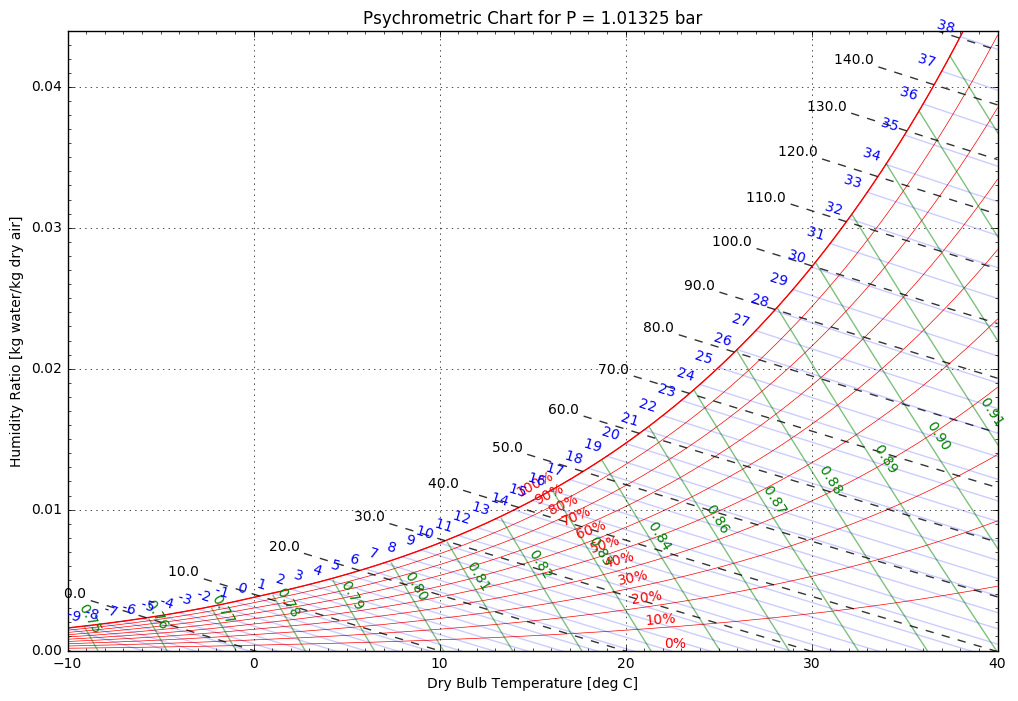

In [11]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import fsolve
from ipywidgets import interact

P = 1.01325        # bar
R = 0.08314        # m3 bar /K kg-mol
Tref = 0.0         # Celsius

Cpair = 1.005      # kJ/kg K
Cpvap = 1.912      # kJ/kg K
Cpliq = 4.182      # kJ/kg K
Hvap = 2500.9      # kJ/kg at Tref

def pChart(P = 1.01325, wmax=0.044, tmin=0.0, tmax=50.0,
           Relative_Humidity=True, Volume=True, Enthalpy=True, Wet_Bulb=True):
    
    fig = plt.figure(figsize=(12,8))
    plt.axis([tmin,tmax,0.0,wmax])
    
    ax = plt.axes()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.010))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.001))

    plt.title('Psychrometric Chart for P = {0:0.5f} bar'.format(P))
    plt.xlabel('Dry Bulb Temperature [deg C]')
    plt.ylabel('Humidity Ratio [kg water/kg dry air]')
    plt.grid()

    # scale factors to convert slopes to angle of rotation on display
    DX = (tmax - tmin)/fig.get_size_inches()[0]
    DY = wmax/fig.get_size_inches()[1]

    # temperature where saturation curve intersects display axes
    wmin = (Mw/Ma)/(P/pSatW(tmin) - 1.0)

    tmid = min(tmax,fsolve(lambda t: (Mw/Ma)/(P/pSatW(t)-1.0) - wmax,(tmin+tmax)/2.0)[0])
    wmid = (Mw/Ma)/(P/pSatW(tmid) - 1.0)
    
    # saturation 
    
    T = np.linspace(tmin,tmax,200)
    plt.plot(T,(Mw/Ma)/(P/pSatW(T)-1.0),'r')

    if Relative_Humidity:
        k = 2*len(T)/3
        dk = len(T)/60

        for rh in np.linspace(0,1.0,11):
            w = (Mw/Ma)*rh/(P/pSatW(T)-rh)
            plt.plot(T,w,'r',linewidth=0.5)
            k -= dk
            plt.text(T[k], w[k], "{0:0.0f}%".format(100*rh),
                 va="bottom",
                 ha="center",
                 rotation = 180.0*np.arctan2((w[k+1]-w[k])/DY,((T[k+1]-T[k]))/DX)/np.pi,
                 color="r")

    if Volume:
        vmin = round((1.0/Ma)*R*(tmin+273.15)/P,2)
        vmax = round((1.0/Ma + wmax/Mw)*R*(tmax+273.15)/P,2)
        for v in np.linspace(vmin,vmax,(vmax-vmin)/0.01 + 1):
            w0 = 0.0    
            t0 = P*v/(R*(1.0/Ma + w0/Mw)) - 273.15
            t1 = t0
            w1 = w0
            for k in range(1,5):
                w1 = (w1 + (Mw/Ma)/(P/pSatW(t1) - 1.0))/2.0
                t1 = P*v/(R*(1.0/Ma + w1/Mw)) - 273.15
            if t1 < tmax:
                t = np.linspace(t1,t0)
                w = Mw*P*v/(R*(t+273.15)) - Mw/Ma
                plt.plot(t,w,'g',alpha=0.5) 
            tc = (t0 + t1)/2.0
            wc = (w0 + w1)/2.0
            if tc > tmin and tc < tmax and wc < wmax:
                plt.text(tc, wc, "{0:0.2f} ".format(v),
                     ha = 'center', 
                     va = 'bottom', 
                     rotation = 180.0*np.arctan2((w0-w1)/DY,(t0-t1)/DX)/np.pi, 
                     color = 'g')
                
    if Enthalpy:
        hmax = round(Cpair*(tmax-Tref) + wmax*(Hvap + Cpvap*(tmax-Tref)), -1)+10
        hmin = round(Cpair*(tmin-Tref), -1)-10
        for h in np.linspace(hmin,hmax,(hmax-hmin)/10 + 1):
            
            #f = lambda t: 0.02*wmax + wmin + (t-tmin)*wmid/(tmid-tmin)
            f = lambda t: (Mw/Ma)/(P/pSatW(t) - 1.0)
            g = lambda t: (h - Cpair*(t-Tref))/(Hvap + Cpvap*(t-Tref))
            
            t = -3 + fsolve(lambda t: f(t)-g(t), (tmin+tmid)/2.0)
            
            t = np.linspace(t,tmax)
            w = (h - Cpair*(t-Tref))/(Hvap + Cpvap*(t-Tref))
            plt.plot(t, w, 'k--', linewidth=1, alpha=0.8)
            if (t[0] > tmin and t[0] < tmax and w[0] < 0.97*wmax):
                plt.text(t[0], w[0], "{0:0.1f} ".format(h),
                     ha = 'right', 
                     va = 'bottom', 
                     rotation = 0*180.0*np.arctan2(-Cpair/Hvap/DY,1.0/DX)/np.pi, 
                     color = 'k')

        hc = (hmax+hmin)/2.0
        tc = (tmid-tmin)*(hc-hmin)/(hmax-hmin) - 2.0
        wc = (hc - Cpair*(tc-Tref))/(Hvap + Cpvap*(tc-Tref))

        #plt.text(tc-3, wc, 'Enthalpy kJ/kg of Dry Air', 
        #     color = 'k', 
        #     va = 'bottom',
        #     ha = 'right')
        
    if Wet_Bulb:
        for ts in np.linspace(tmin,round(tmax),round(tmax-tmin)+1):
            ws = (Mw/Ma)/(P/pSatW(ts) - 1.0)
            t = np.linspace(ts,tmax)
            num = Cpair*(ts-t) + ws*(Hvap + Cpvap*(ts-Tref) - Cpliq*(ts-Tref))
            den = Hvap + Cpvap*(t-Tref) - Cpliq*(ts-Tref)
            w = num/den
            plt.plot(t,w,'b',alpha=0.2)
 
            if ts > tmin and ts < tmid:
                plt.text(ts,ws,"{0:-2.0f} ".format(ts),
                    ha = 'right', 
                    va = 'bottom', 
                    rotation = 180.0*np.arctan2(-Cpair/Hvap/DY,1.0/DX)/np.pi, 
                    color = 'b')
    plt.savefig('PsychrometricChart.png')
            
interact(pChart,
         P=(0.5,3,.1),
         wmax = (0.02,0.06,0.005),
         tmin = (-20,20,2),
         tmax = (30,60,2));

## References <a id="References"></a>

1. 
http://www.vaisala.com/Vaisala%20Documents/Application%20notes/Humidity_Conversion_Formulas_B210973EN-F.pdf

2. W. Wagner and A. Pru&#223;. The IAPWS Formulation 1995 for the Thermodynamic Properties of Ordinary Water Substance for General and Scientific Use.  J. Phys. Chem. Ref. Data, Vol. 31, No. 2, 2002. http://thermophysics.ru/pdf_doc/IAPWS_1995.pdf



## Exercises and Applications <a id="ExercisesApplications"></a>

### Warmups

1. What is the dew point of air 20 $^\circ$C at 50% relative humidity?

2. Normal human breathing warms air to body temperature, 37$^\circ$C, saturated with water vapor.  What is the water content of exhaled air? If inhalation and exhalation rates are the same, and inhaled air is at 20$^\circ$C and a relative humidity of 40%, how much water is lost per 12 hours by normal breathing?

3. The makeup air supply for a commercial building must take exterior air at 30$^\circ$C and 80% relative humidity and condition it for distribution at 20$^\circ$C and 40% relative humidity. Show the steps needed for this operation on a psychrometric chart.  How much energy is required per kilogram of dry air?

### Laboratory Air Supply

A university educational science laboratory must supply fresh air at rate of 5 liters/sec/person. On a cool day in South Bend, Indiana, the outdoor air temperature is 0$^\circ$C at 20% relative humidity.  The air must be heated and conditioned to 21$^\circ$C at 60% relative humidity before venting into the laboratory.  

1. What is the mass flow of air into the laboratory (on a dry air basis)?  What is the volumetric flow?
2. How much water must be added through humidification?
3. What is the energy requirement (in watts)?
4. Can you suggest means of recoving energy and water from the laboratory exhaust without compromising air quality?  What is the maximum possible energy efficienty?


### Snowmaking 

Snowmaking equipment for ski resorts operate by spraying fine water droplets in a large flow of air. The droplet temperature is lowered by evaporative cooling and can be no higher than -2 degrees Celsius for effective snow making. 

1. If the liquid water temperature is initially the same temperature as the air, what is the maximum air temperature for which snowmaking is possible?
2. Assuming the relative humidity is 30%, sketch a flow diagram. What should be the water flowrate per cubic meter of air? 

### WaterSeer

[WaterSeer](http://waterseer.org/) is an indiegogo project developed by students at UC Berkeley for the capture and condensation of water vapor from air.  The goal of the project is to develop a practical device to augment water supplies in regions of the world without access to safe water. 

In [7]:
from IPython.display import HTML
HTML('<iframe src="https://player.vimeo.com/video/182748120'
     + '?title=0&byline=0&portrait=0" width="640" height="360"'
     + 'frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe>')

Can you validate the claim that a device like this can potentially extract 37 liters of water per day in an arid or semi-arid region of the world? Assume an average day of 24$^\circ$C with 70% relative humidity (a typical October day in Los Angeles). Assume the soil temperature is 54$^\circ$F $\approx$ 12$^\circ$C.

1. What is the Humidity Ratio of the incoming air? (i.e., water vapor content in units of kg water / kg dry air.)
2. What is the dew point of the incoming air?
3. How much water can be extracted per kilogram of dry air?
4. What volume of humid air must be treated to produce 37 liters of water per day?  Does this seem plausible? If the pipe connecting the upper and lower part of the unit has an internal diameter of 6 inches, what is the average air speed? (Keep in mind that air must be routed in both directions.)
5. How much heat is released by condensation? Express your answer in watts. Where does the heat go?  Think carefully about this one, and devise a way to discharge at least a portion of the heat in the exiting air.

#### Solution

**Question 1.** Using the psychrometric chart, the mixing ratio (i.e., humidity ratio) for a temperature 24$^\circ$C with 70% relative humidity is 

$$w_{in} = 0.013 \mbox{ kg/kg dry air}$$

**Question 2.** Starting with humid air at 24$^\circ$C with 70% relative humidity, the dew point is found by cooling air until the saturation curve is reached on the psychrometric chart. The dew point found is approximately 18$^\circ$C.

**Question 3.** The condensor can operate at a temperature no lower than the soil temperature of 12$^\circ$C. At 12$^\circ$C the humidity ratio 

$$w_{out} = 0.009 \mbox{ kg/kg dry air}$$

The total amount of water that can be extracted is 

$$w_{out} - w_{in} = 0.013 - 0.009 = 0.004 \mbox{ kg/kg dry air}$$

**Question 4.** Assuming a liquid density of 1 kg/liter, the requirement is to produce $\dot{m}_W = 37$ kg of water per day. From the mass balance, the unit must process

$$\dot{m}_A = \frac{\dot{m}_W}{w_{in}-w_{out}} = \frac{37}{0.013 - 0.009} = 9250 \mbox{ kg dry air / day}$$

From the psychrometric chart, the specific volume $v_{in}$ is 0.855 cubic meters per kg dry air. The total volume of air to be treated is 

$$\dot{V}_{in} = v_{in} \dot{m}_W =  0.855 \times 9250 = 7,909 \mbox{cu. m/day}$$

The cross sectional area of a 6 inch pipe is 182 sq. cm, of which half, 91 sq cm = 0.0091 sq m would be available for downflow to the condenser chamber. The average air speed would be 7,909/24/3600/0.0091 = 10 meters per second.

**Question 5.** The specific enthalpy of the entering air $h_{in}$ is approximately 58 kJ/kg dry air. If the processed air exits at 12$^\circ$C the specific enthalpy $h_{out}$ would be  34 kJ/kg dry air. The specific enthalpy of the exiting water is $\hat{C}_{p,liq}(T - T_{ref})$

In [8]:
mw = 9250.0     # inlet flow of humid air, in kg dry air
win = 0.013     # kg water / kg dry air
wout = 0.009    # kg water / kg dry air
hin = 58.0      # kJ/kg dry air
hout = 34.0     # kJ/kg dry air  at 24 deg C
hliq = Cpliq*(12.0 - 0.0)

Q = mw*(hin - hout) - mw*(win-wout)*hliq
print "Condenser Heat Duty = ", Q, " kJ/day"
print "Condenser Heat Duty = ", Q/24/3600, " kJ/sec"

Condenser Heat Duty =  220143.192  kJ/day
Condenser Heat Duty =  2.54795361111  kJ/sec


The condenser heat duty could be reduced by using the exiting air stream to cool incoming air. The maximum heat recovery corresponds to an exit air stream at the external temperature with  specific enthalpy $h_{out}$ of 46 kJ/kg dry air. In that case

In [9]:
mw = 9250.0     # inlet flow of humid air, in kg dry air
win = 0.013     # kg water / kg dry air
wout = 0.009    # kg water / kg dry air
hin = 58.0      # kJ/kg dry air
hout = 46.0     # kJ/kg dry air  at 24 deg C
hliq = Cpliq*(12.0 - 0.0)

Q = mw*(hin - hout) - mw*(win-wout)*hliq
print "Condenser Heat Duty = ", Q, " kJ/day"
print "Condenser Heat Duty = ", Q/24/3600, " kJ/sec"

Condenser Heat Duty =  109143.192  kJ/day
Condenser Heat Duty =  1.26323138889  kJ/sec


These numbers are high for a device with no external power supplies and to be built at very low cost.  Of particular concern are the high gas flow rates which limit the opportunity for heat transfer, and the substantial condenser heat duty.  